In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
# import the libraby you need here

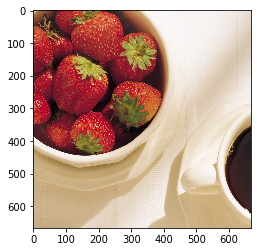

In [3]:
rgbimg = cv2.cvtColor(cv2.imread("image.jpg",cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(rgbimg)

C:\Users\farha\Anaconda3\envs\tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


36.76558434461821


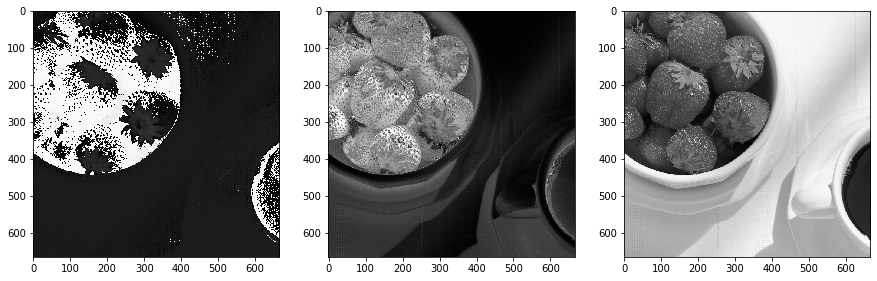

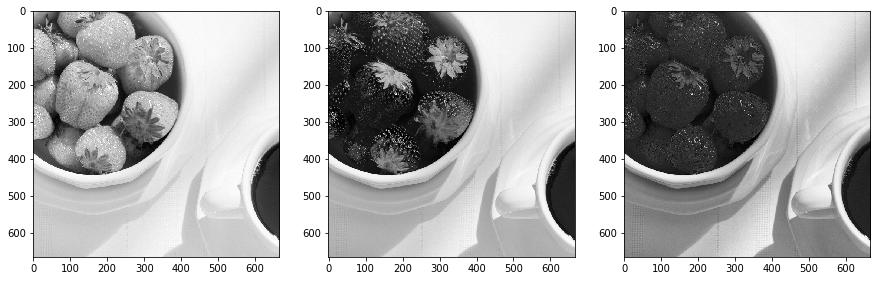

In [4]:
#  show each components in different color models
def rgb2hsi(rgbimg):
    # convert rgb images to hsi images
    # Hint: Normalize Hue value to [0,255] for demonstration purpose.
    '''your code here'''

    newrgb=np.divide(rgbimg,255) #normalize the value of rgb to 0 -1
    h=[]
    s=[]
    i=[]
    for height in range (rgbimg.shape[0]):
        for width in range (rgbimg.shape[1]):
            r=newrgb[height,width,0]
            g=newrgb[height,width,1]
            b=newrgb[height,width,2]

            #count Hue
            temp1=0.5*((r-g)+(r-b))
            temp2=(((r-g)**2)+((r-b)*(g-b)))**0.5
            teta= math.degrees(math.acos(temp1/temp2))

            if(b<=g):
                H=teta
            if(b>g):
                H=360-teta
            
            #normalize Hue to 0-255
#             H=(H/360*255)
            
            #Count Saturation
            S=1-((3/(r+g+b))*min(r,g,b))

            #Count Intensity
            I=(r+g+b)/3

            h.append(H)
            s.append(S)
            i.append(I)
    print(teta)
    h=np.reshape(np.asarray(h),(rgbimg.shape[0],rgbimg.shape[1]))
    s=np.reshape(np.asarray(s),(rgbimg.shape[0],rgbimg.shape[1]))
    i=np.reshape(np.asarray(i),(rgbimg.shape[0],rgbimg.shape[1]))     
    
    return h,s,i

def hsi2rgb(hsiimg):
    # convert hsi images to rgb images
    '''your code here'''
    r=[]
    g=[]
    b=[]
    for height in range (hsiimg.shape[0]):
        for width in range (hsiimg.shape[1]):
            h=hsiimg[height,width,0]
#             h=h/255*360 #Normalize back the value to degree
            s=hsiimg[height,width,1]
            i=hsiimg[height,width,2]
            
            #For 0 ° < H ≤ 120 °
            if(0<h<=120):
                #Count Blue
                B=(1-s)/3
                
                #count Red
                R=(1+((s*math.cos(math.radians(h)))/math.cos(math.radians(60-h))))/3
                
                #Count Green
                G=1-(R+B)
                
                R=R*3*i
                G=G*3*i
                B=B*3*i

            elif(120<h<=240):
                h=h-120
                #Count Red
                R=(1-s)/3

                #count Green
                G=(1+((s*math.cos(math.radians(h)))/math.cos(math.radians(60-h))))/3

                #Count Blue
                B=1-(R+G)
                                
                R=R*3*i
                G=G*3*i
                B=B*3*i
                
            elif(240<h<=360):
                h=h-240
                #Count Green
                G=(1-s)/3
                
                #count Blue
                B=(1+((s*math.cos(math.radians(h)))/math.cos(math.radians(60-h))))/3
                
                #Count Red
                R=1-(B+G)
                
                R=R*3*i
                G=G*3*i
                B=B*3*i
                
 
            r.append(R)
            g.append(G)
            b.append(B)

    r=np.reshape(np.asarray(r),(hsiimg.shape[0],hsiimg.shape[1]))
    g=np.reshape(np.asarray(g),(hsiimg.shape[0],hsiimg.shape[1]))
    b=np.reshape(np.asarray(b),(hsiimg.shape[0],hsiimg.shape[1]))  

    return r,g,b


# rgb2hsi
h,s,i = rgb2hsi(rgbimg)
# show the result
plt.figure(figsize = (15,10))
plt.subplot(1,3,1)
plt.imshow(h,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(s,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(i,cmap='gray')

# construct hsi images
hsiimg = np.zeros((rgbimg.shape[0],rgbimg.shape[1],3))
hsiimg[:,:,0] = h
hsiimg[:,:,1] = s
hsiimg[:,:,2] = i

# hsi2rgb
r,g,b = hsi2rgb(hsiimg)
# show the result
plt.figure(figsize = (15,10))
plt.subplot(1,3,1)
plt.imshow(r,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(g,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(b,cmap='gray')

### Question 1

Q:  We can actually find discontinuity in hue(H) component of the image that is hard to interpret. 
    In this case, it is especially apparent around the strawberries, which are depicted in gray level values near both black       and white.
    Why is that?     
    
A: Hue is a component that determined by an angle from a reference point.The discontinuity in the hue actually because we have transition from 0 degree to 360 degree (The hue range value). By convention, to determine the hue value, reference point is taken as angle from red axis which hue will increases counterclockwise from red axis. Hue take Red as start point, that will explain why the discontinuity in this image appear around the strawberries that have red color and this red color is very different from the image.

In [13]:
hsiimg[:,:,2].shape

(666, 666)

C:\Users\farha\Anaconda3\envs\tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:8: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


(443556,)
(666, 666)
[[[36.1783907   0.0787037   0.76821312]
  [30.94504954  0.08042489  0.7970741 ]
  [28.34647252  0.09076923  0.77240337]
  ...
  [35.2087191   0.04504505  0.80848838]
  [33.0044916   0.05120482  0.7970741 ]
  [32.5429239   0.06051437  0.7970741 ]]

 [[35.49636654  0.08715596  0.78263041]
  [32.68018395  0.08878505  0.75192986]
  [30.          0.09952607  0.72988078]
  ...
  [30.          0.04464286  0.81506732]
  [33.0044916   0.05074627  0.81128742]
  [33.0044916   0.05097451  0.80858029]]

 [[33.30430518  0.09627329  0.76065811]
  [33.30430518  0.09904153  0.71316136]
  [33.67049651  0.11363636  0.6863792 ]
  ...
  [30.          0.04484305  0.80870316]
  [30.          0.04504505  0.80848838]
  [30.          0.04484305  0.80870316]]

 ...

 [[37.58908947  0.21084337  0.46555565]
  [35.41482247  0.21242485  0.47532217]
  [34.57055127  0.19767442  0.54495036]
  ...
  [38.32119665  0.23828125  0.52396992]
  [38.32119665  0.23828125  0.52396992]
  [38.32119665  0.23282

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'HSI Equalized Histogram Image')

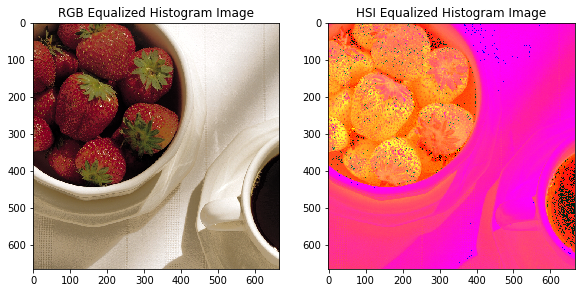

In [18]:
# histogram equalization

def histeq(im,nbr_bins=256):
    """  Histogram equalization of a grayscale image. 
         From http://programmingcomputervision.com/"""

    # get image histogram
    imhist,bins = np.histogram(im.flatten(),nbr_bins,normed=True)
    cdf = imhist.cumsum() # cumulative distribution function
    cdf = 1 * cdf / cdf[-1] # normalize (value component max is 1.0)
    
    # use linear interpolation of cdf to find new pixel values
    im2 = np.interp(im.flatten(),bins[:-1],cdf)
    print(im2.shape)
    print(im.shape)
    return im2.reshape(im.shape), cdf

def histogram_equalization(input):
    #choose the color model that is most suitable for histogram equalization.
    """  Histogram equalization of a grayscale image. 
         From http://programmingcomputervision.com/"""

    #equalise the intensity component from hsi
    input[:,:,2], cdf = histeq(input[:,:,2])
    
    
    #convert equalized hsi image to rgb image
    r2,g2,b2 = hsi2rgb(input)
    heimage = np.zeros((rgbimg.shape[0],rgbimg.shape[1],3))
    heimage[:,:,0] = r2
    heimage[:,:,1] = g2
    heimage[:,:,2] = b2
    
    return heimage,input
    
heimage,heimagehsi = histogram_equalization(hsiimg) #choose the color model you want to use as input here (rgbimg or hsiimg)
    
plt.figure(figsize = (15,10))
plt.subplot(1,3,1)
plt.imshow(heimage)
plt.title("RGB Equalized Histogram Image")
plt.subplot(1,3,2)
plt.imshow(heimagehsi)
plt.title("HSI Equalized Histogram Image")


[]

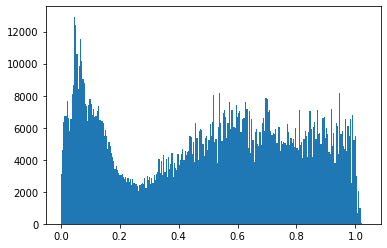

In [20]:
plt.hist(heimage.ravel(),bins=256)
plt.plot()

### Question 2

Q: which color model do you use? Briefly explain the reason why.

A:Histogram Equalization can be considered as redistribution of the intensity of the image. Color histogram equalization can be achieved by converting a color image into HSV/HSI image and enhancing the Intensity while preserving hue and saturation components. However, performing histogram equalization on components of R,G and B independently will not  enhance the image. It is generally unwise to histogram equalize the components of a RGB color image independently. This results in false color. A more logical approach is to spread the color intensities uniformly,leaving the colors themselves (e.g., hues)unchanged. The HSI color space is ideally suited to this approach since we just need to equalize the intensity and saturation component will increased after histogram equalization.

109.32529216163832


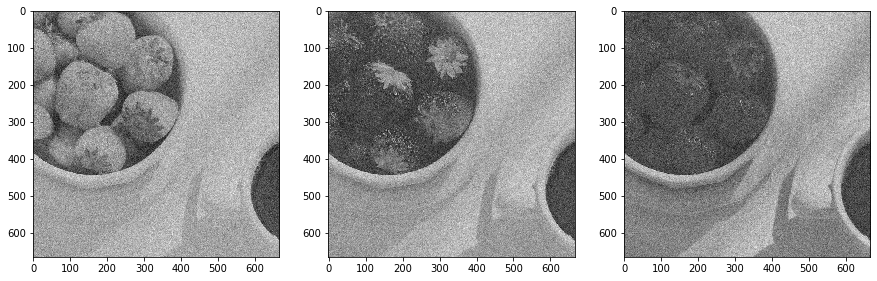

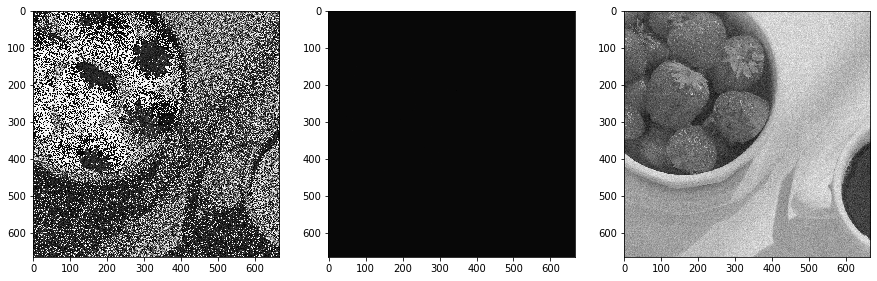

In [5]:
# converting noisy RGB images HSI
gaussian = np.random.normal(0, 28, (rgbimg.shape[0],rgbimg.shape[1],3))
noisy_rgb = rgbimg + gaussian
(r, g, b) = cv2.split(noisy_rgb)
plt.figure(figsize = (15,10))
plt.subplot(1,3,1)
plt.imshow(r,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(g,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(b,cmap='gray')

noisy_h,noisy_s,noisy_i = rgb2hsi(noisy_rgb)
plt.figure(figsize = (15,10))
plt.subplot(1,3,1)
plt.imshow(noisy_h,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(noisy_s,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(noisy_i,cmap='gray')

### Question 3

Q:  Briefly compare the different results of six components from two different color models (R,G,B,H,S,I).
    What components in the HSI model are severely disturbed? Why is that?

A: The components in the HSI model those are severely disturbed is saturation and hue. This is happened because degradation in hue and saturation planes is depended on the nonlinearity of cos and min operation. While the intensity plane is slightly smooter than others because image averaging in intensity (1/3*(R+G+B)) actually will reduce random noise like gaussian noise.